<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1">EDA</a></span><ul class="toc-item"><li><span><a href="#data-size-and-columns" data-toc-modified-id="data-size-and-columns-1.1">data size and columns</a></span></li><li><span><a href="#missing-values" data-toc-modified-id="missing-values-1.2">missing values</a></span></li><li><span><a href="#Target:'HeartDisease'" data-toc-modified-id="Target:'HeartDisease'-1.3">Target:'HeartDisease'</a></span></li><li><span><a href="#numerical-variables" data-toc-modified-id="numerical-variables-1.4">numerical variables</a></span><ul class="toc-item"><li><span><a href="#interquantile-range" data-toc-modified-id="interquantile-range-1.4.1">interquantile range</a></span></li></ul></li><li><span><a href="#categorical-variables" data-toc-modified-id="categorical-variables-1.5">categorical variables</a></span></li><li><span><a href="#variable-independence" data-toc-modified-id="variable-independence-1.6">variable independence</a></span></li></ul></li></ul></div>

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

## data size and columns

In [2]:
df=pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


get the columns names of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## missing values

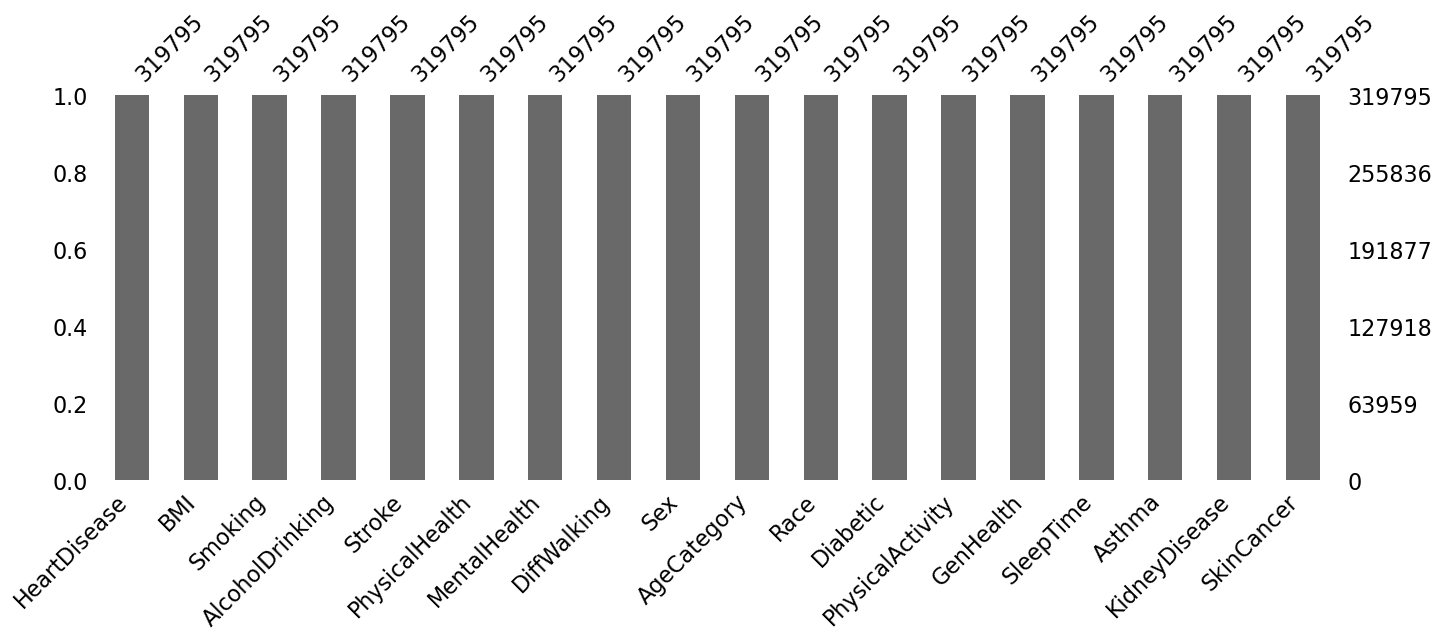

In [57]:
msno.bar(df, figsize = (16,5))
#msno.matrix(df, figsize = (16,5))
plt.show()

There are no missing values

## Target:'HeartDisease'

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

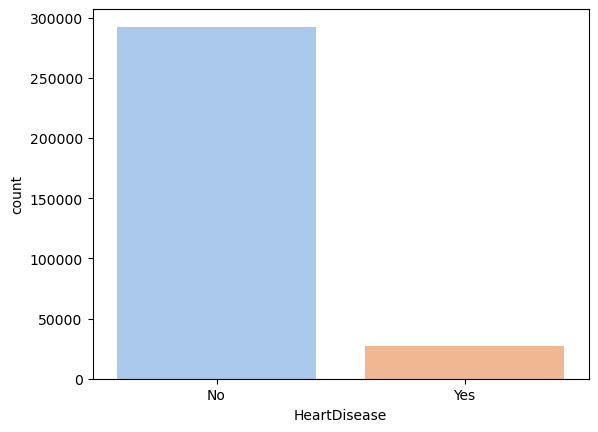

In [16]:
sns.countplot(x='HeartDisease',data=df,palette='pastel')

The chart reveals that there is an imbalance in the number of records for HeartDisease, indicating an uneven distribution of data between individuals who have the ailment and those who do not. This could cause the trained model's predictions for heart disease to be severely biased. 

1.To balance the class distribution, we will use SMOTE (Synthetic Minority Oversampling Technique). However, before using SMOTE, all categorical data must be transformed into binary using dummy variables for the method to function effectively.

2.classification accuracy may not be a good metric in measuring the prediction performance of the fitted model; we may consider other metrics such as the AUC.

## numerical variables

Get a basic description of numeric data

In [56]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


There are four numerical variables in the data.

'BMI'
'PhysicalHealth'
'MentalHealth' 
'SleepTime'

In [3]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

Text(0.5, 0.98, 'Visualizing continuous columns (df dataset)')

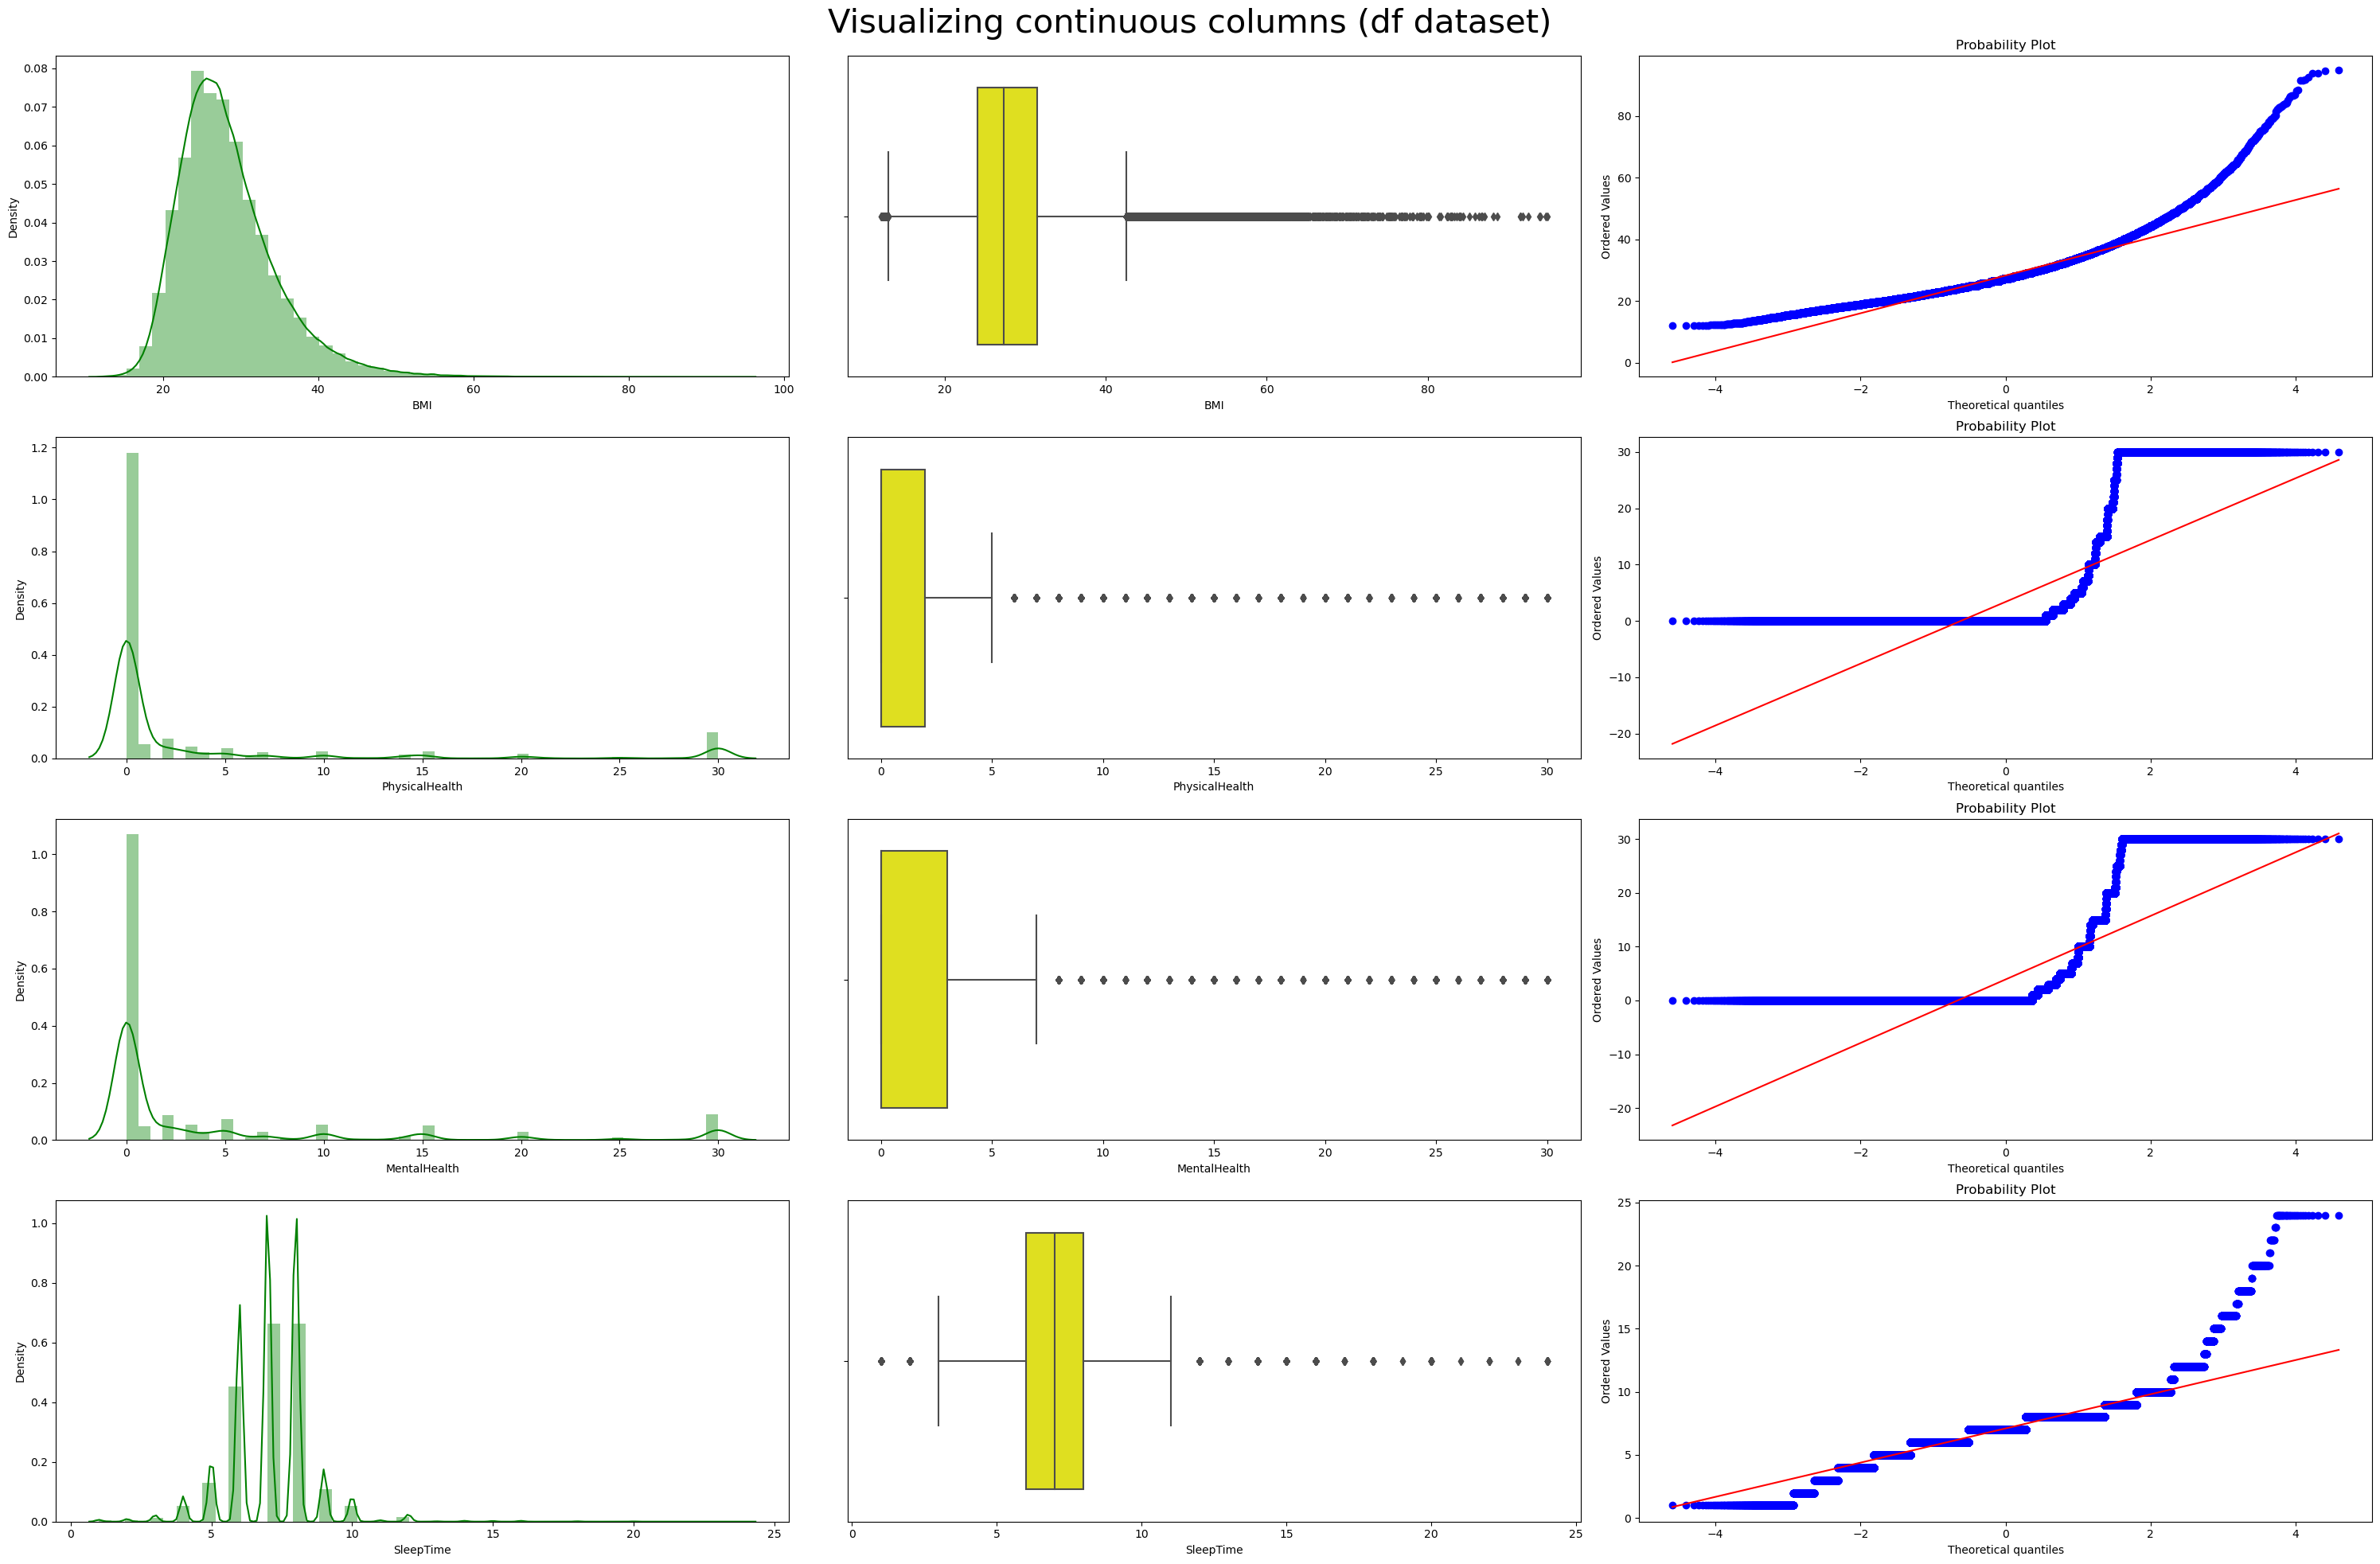

In [62]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),3,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    #sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (df dataset)",fontsize=30)

In the first column distribution graphs,BMI and SleepTime are asymptotically normally distributed.But PhysicalHealth and MentalHealth are distributed at both of the extremes.

In the second column bar plots,BMI and SleepTime are more clustered in the center.But PhysicalHealth and MentalHealth are more clustered in the extreme left hand side.

In the third column qq plot,the points of BMI and SleepTime roughly fall along a straight line.However,PhysicalHealth and MentalHealth are derive from the line severely.

The analysis showed that only the BMI and SleepTime variable is close to the normal distribution, the PhysicalHealth and MentalHealth are close to bimodal.Therefore,we would treat PhysicalHealth and MentalHealth as categorical variables.

View summary statistics of numerical variables

In [49]:
df[['BMI','HeartDisease']].groupby('HeartDisease').describe()

BMI                                                        
                 count       mean       std    min    25%    50%    75%    max
HeartDisease                                                                  
0.0           292422.0  28.224658  6.325660  12.02  23.89  27.26  31.32  94.85
1.0            27373.0  29.401592  6.577151  12.21  25.06  28.34  32.69  83.33

In [50]:
df[['PhysicalHealth','HeartDisease']].groupby('HeartDisease').describe()

PhysicalHealth                                                
                      count      mean        std  min  25%  50%   75%   max
HeartDisease                                                               
0.0                292422.0  2.956416   7.400378  0.0  0.0  0.0   1.0  30.0
1.0                 27373.0  7.808242  11.487819  0.0  0.0  0.0  15.0  30.0

In [52]:
df[['MentalHealth','HeartDisease']].groupby('HeartDisease').describe()

MentalHealth                                              
                    count      mean       std  min  25%  50%  75%   max
HeartDisease                                                           
0.0              292422.0  3.828778  7.828079  0.0  0.0  0.0  3.0  30.0
1.0               27373.0  4.641764  9.171932  0.0  0.0  0.0  4.0  30.0

In [53]:
df[['SleepTime','HeartDisease']].groupby('HeartDisease').describe()

SleepTime                                              
                 count      mean       std  min  25%  50%  75%   max
HeartDisease                                                        
0.0           292422.0  7.093416  1.399331  1.0  6.0  7.0  8.0  24.0
1.0            27373.0  7.136156  1.780863  1.0  6.0  7.0  8.0  24.0

### interquantile range

In [4]:
num_df=df[numeric_features]
# let's see how many outliers are in every column
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#condition
filt = ((num_df < (lower_bound)) | (num_df > (upper_bound)))
filt.sum()

BMI               10396
PhysicalHealth    47146
MentalHealth      51576
SleepTime          4543
dtype: int64

## categorical variables

In [21]:
for column_name in categorical_features:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


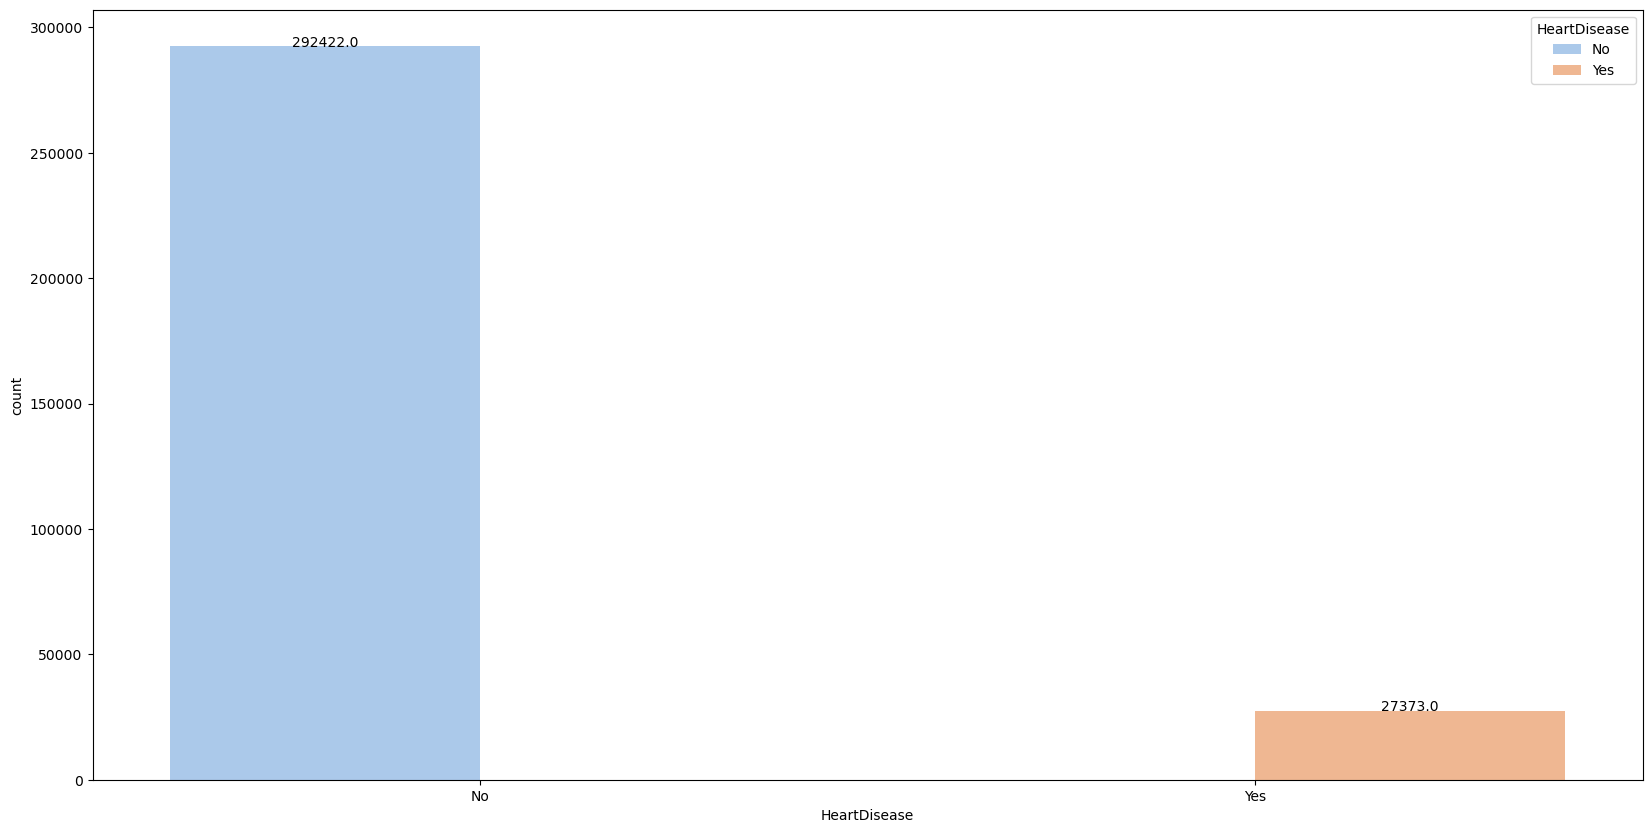

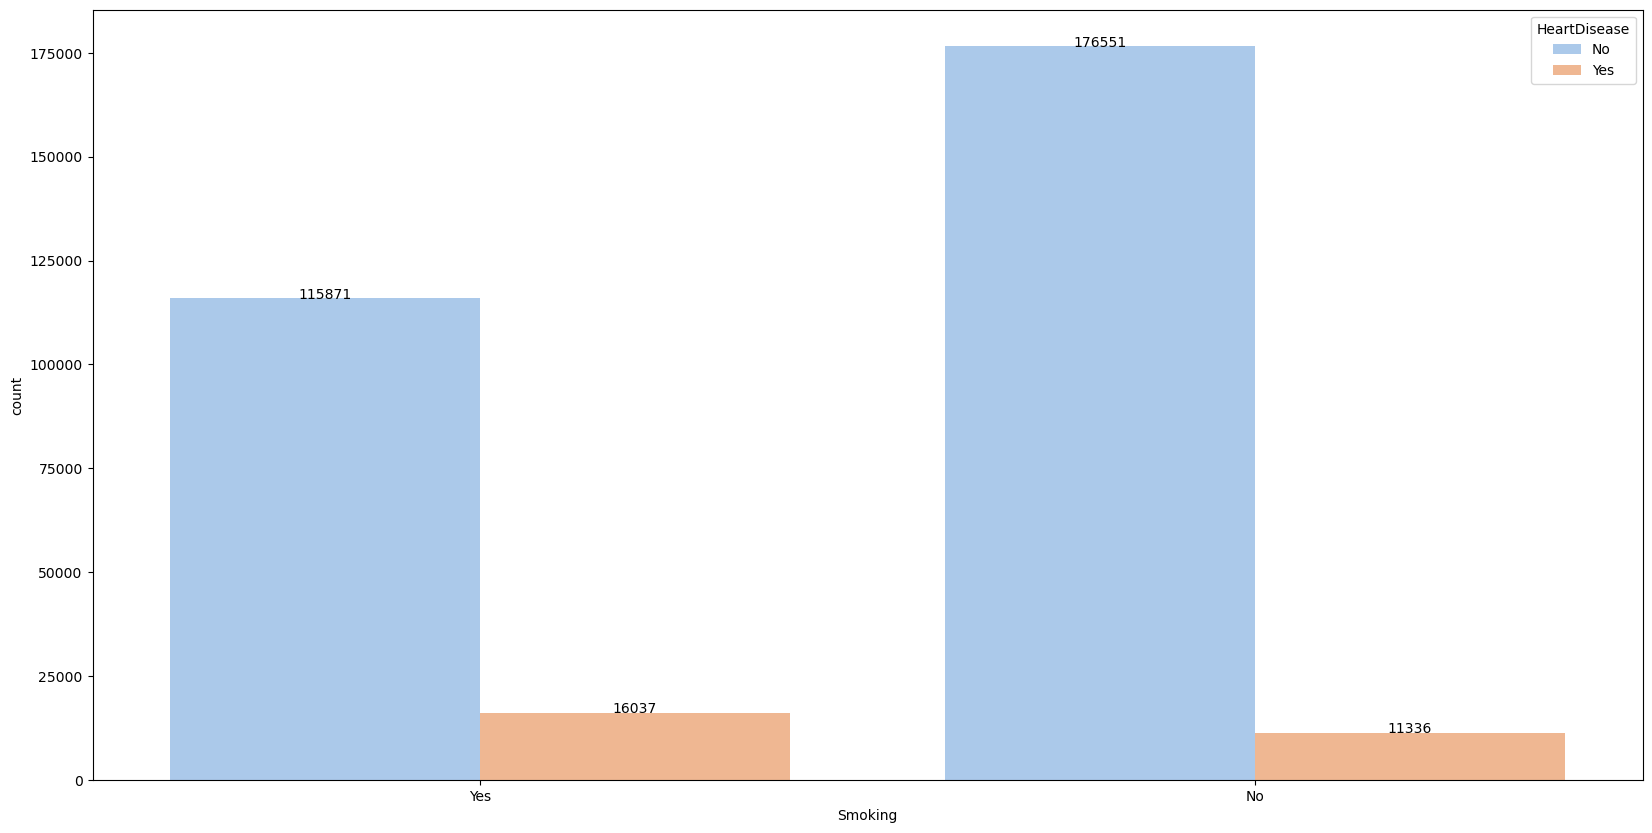

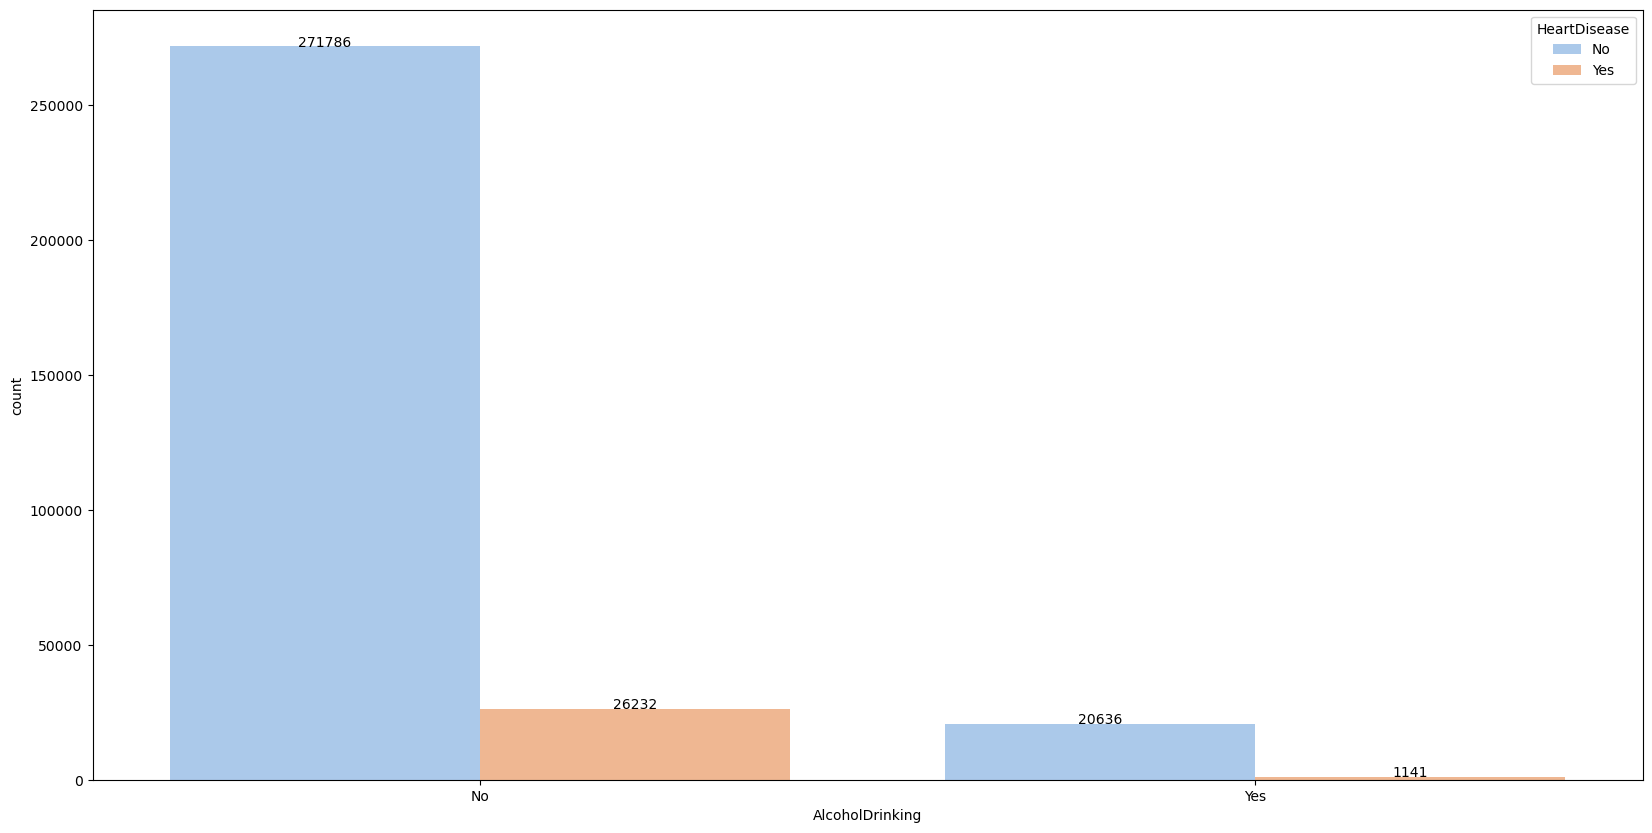

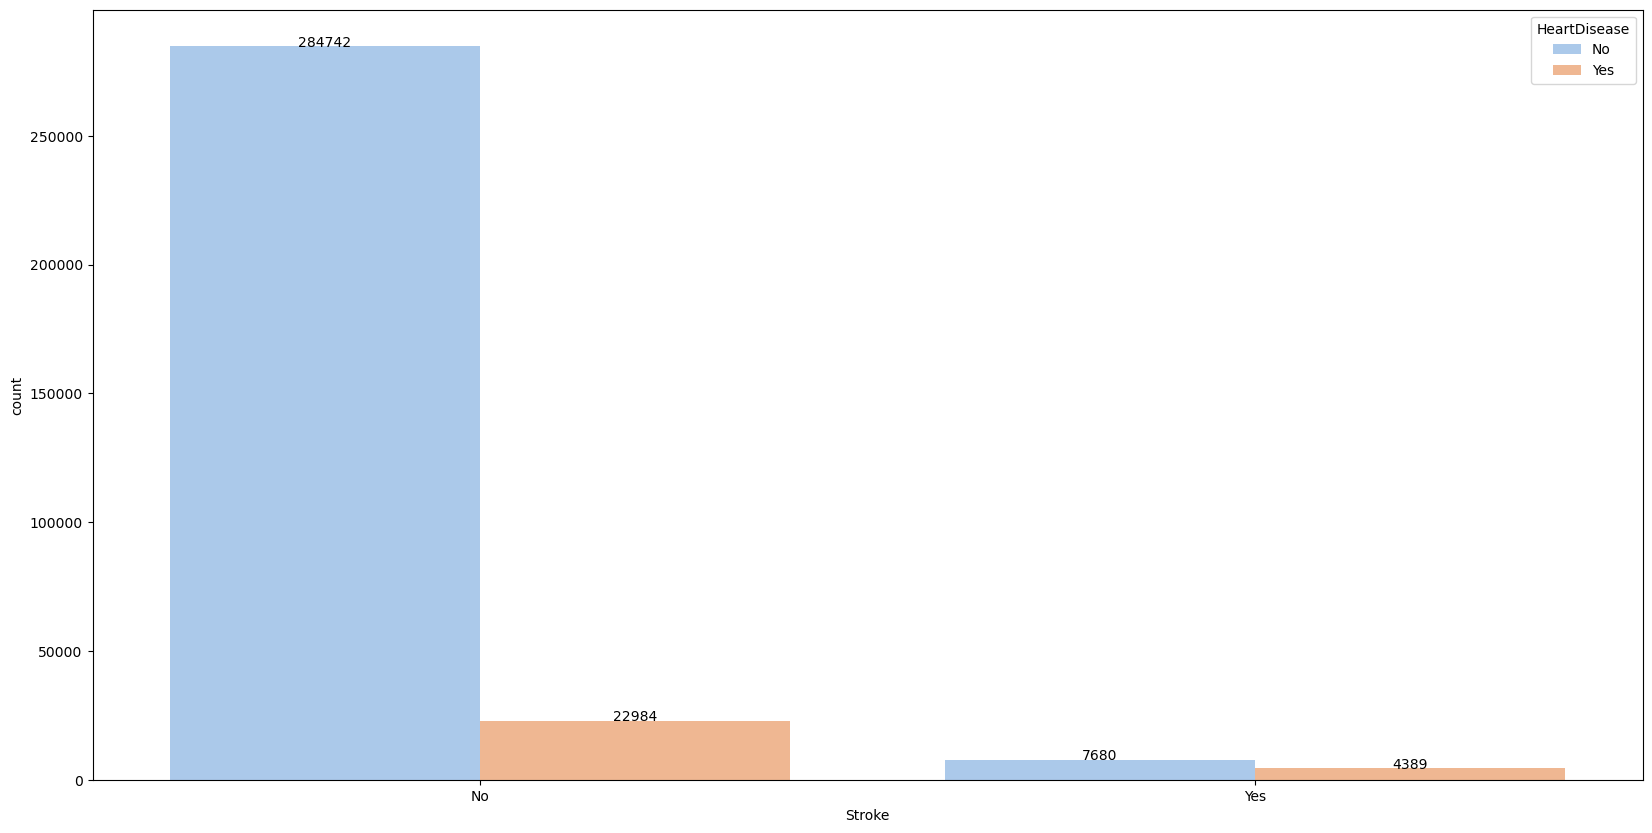

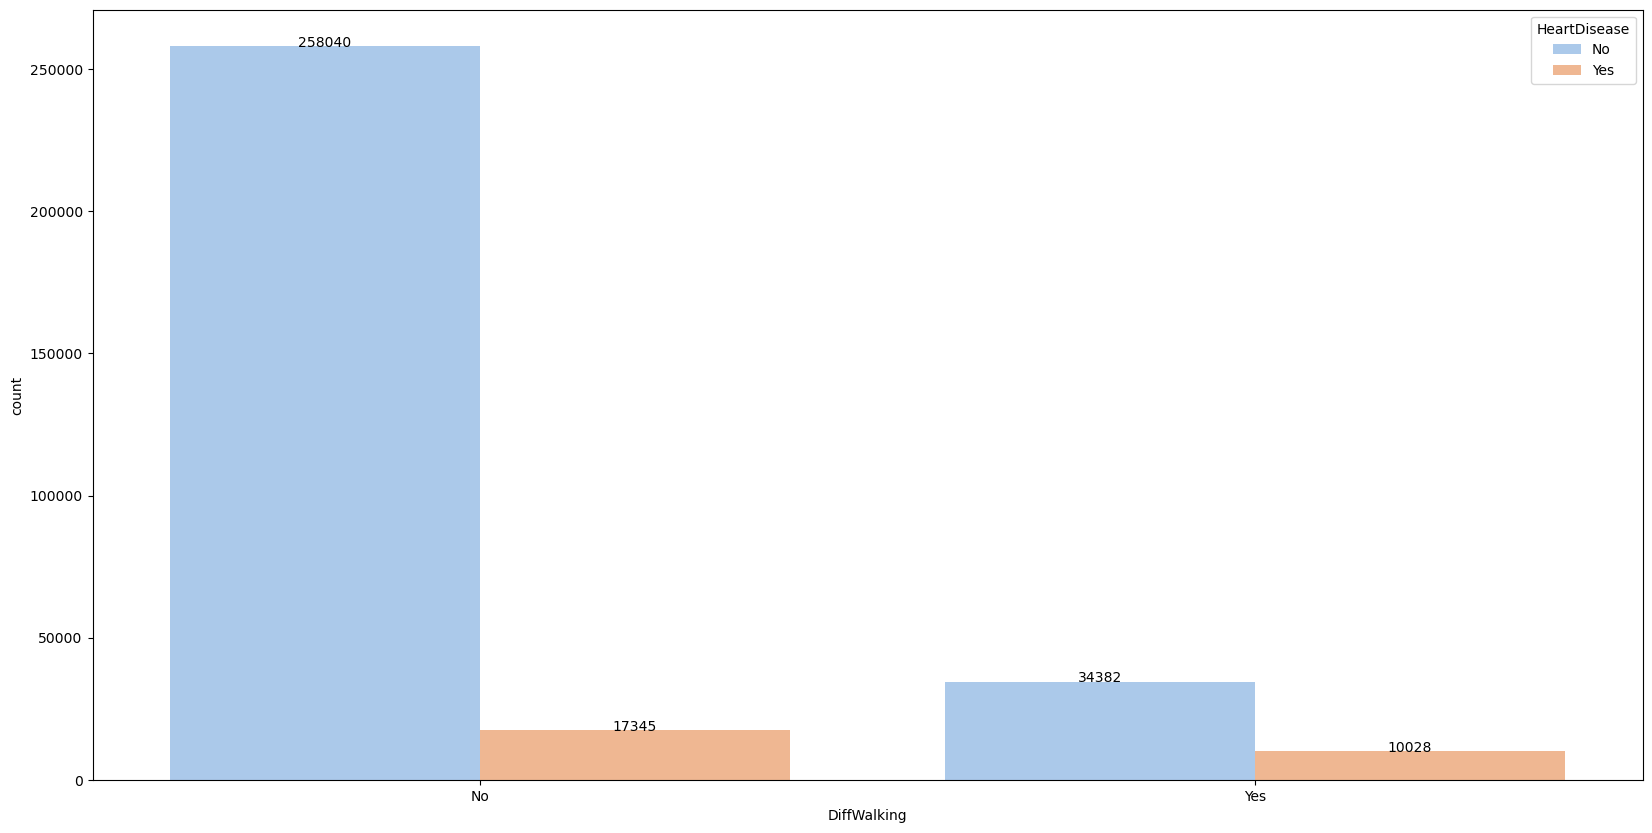

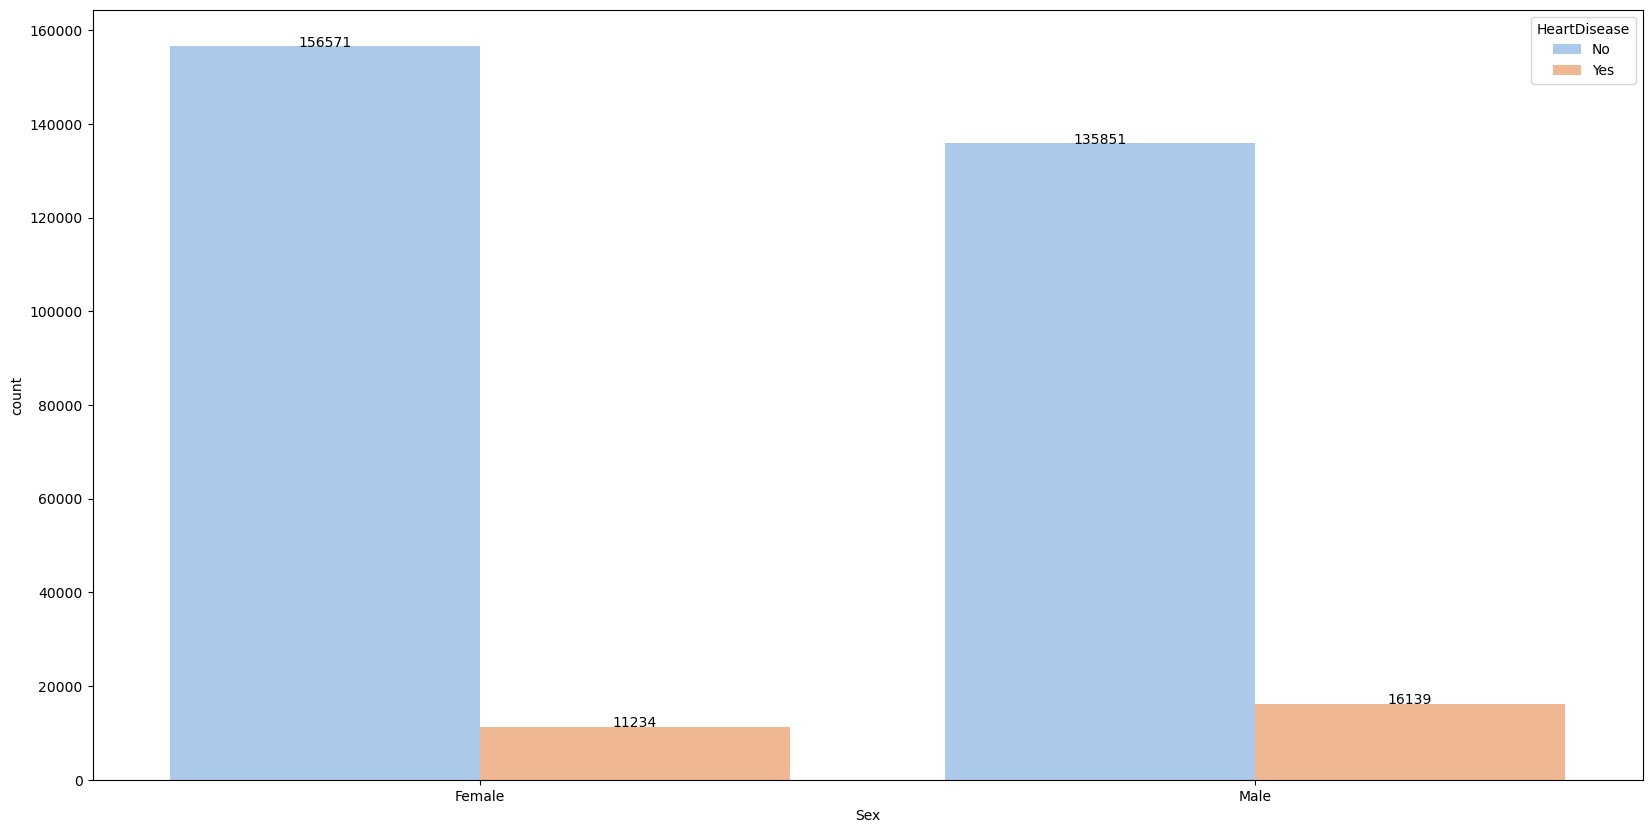

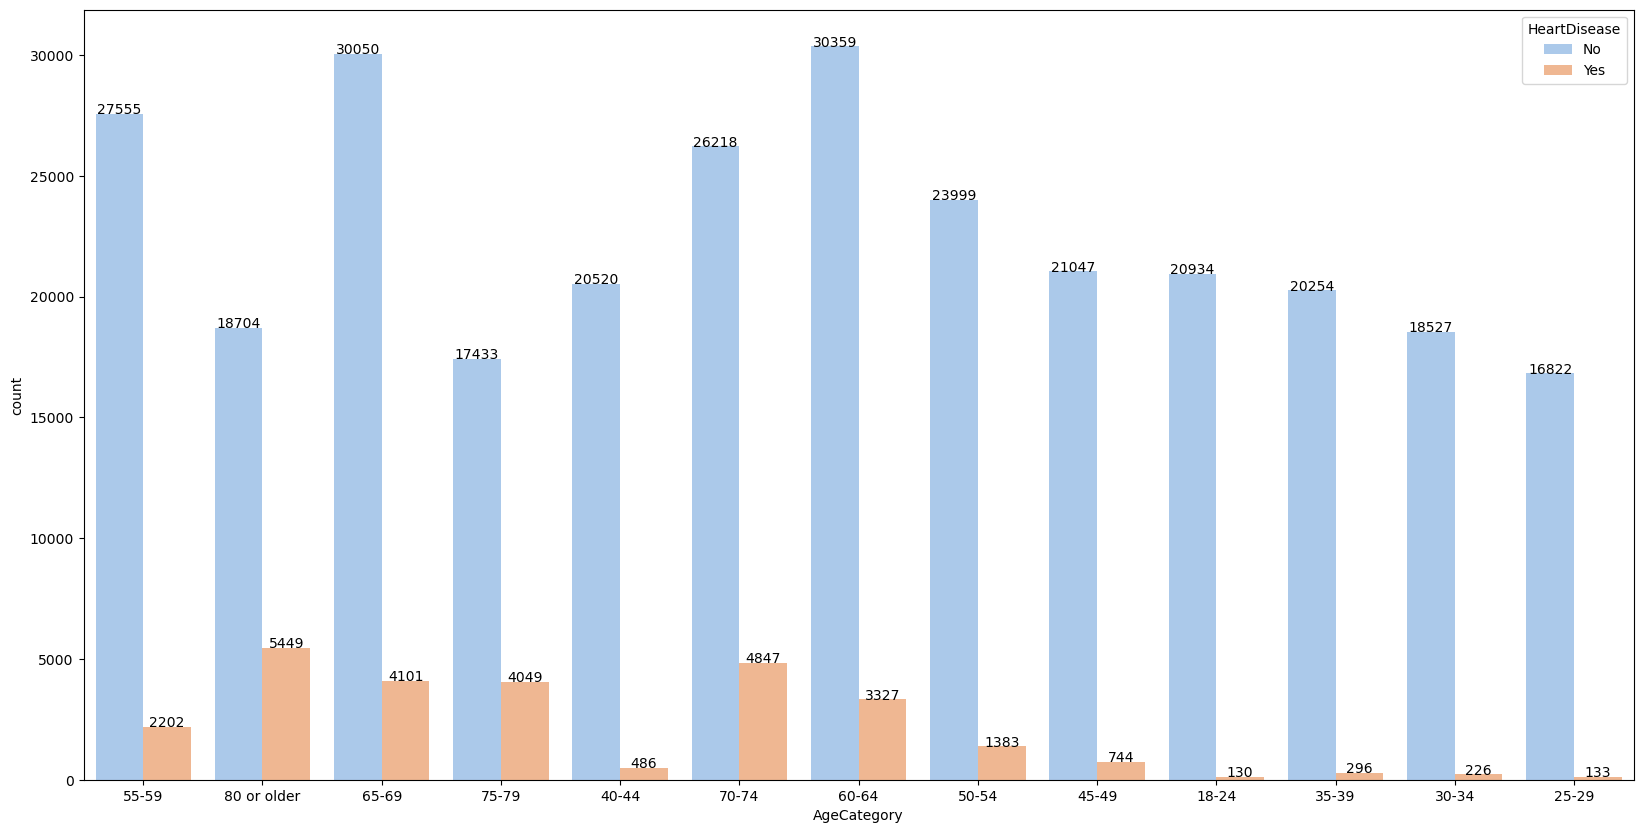

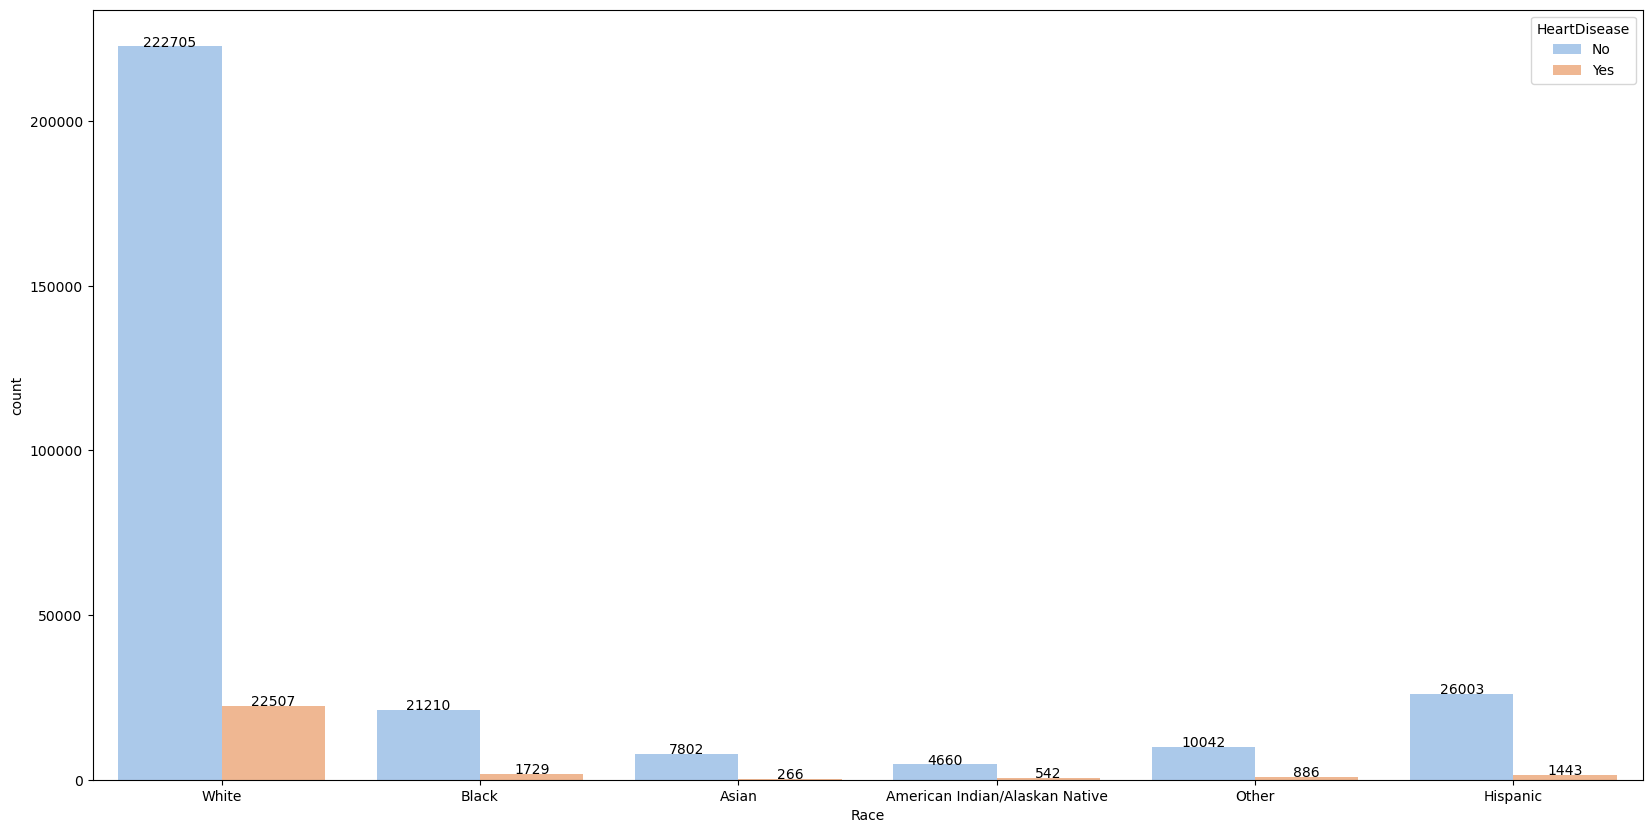

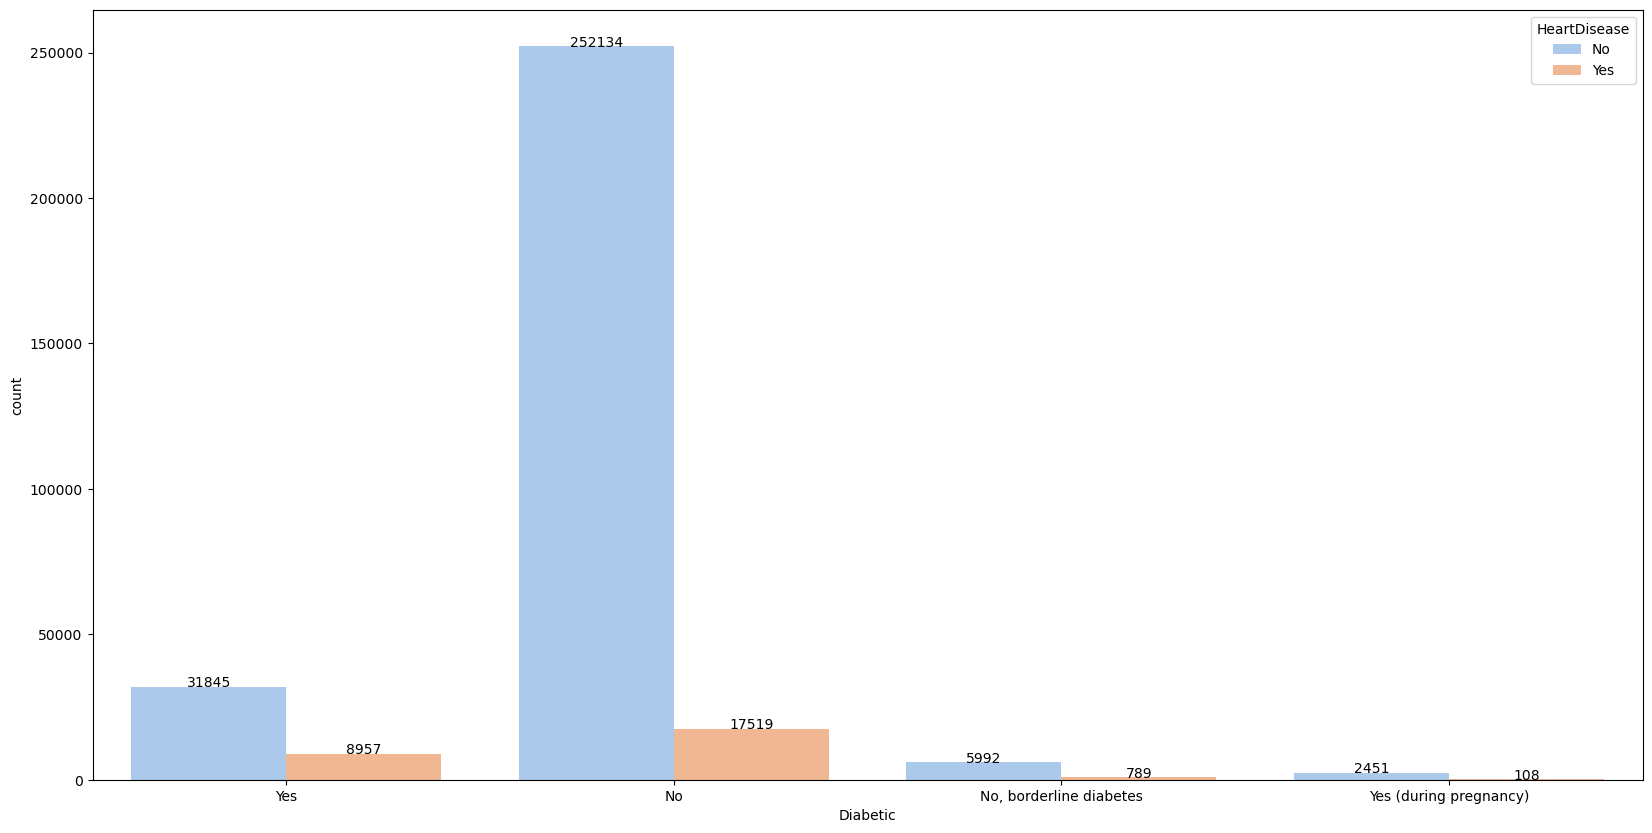

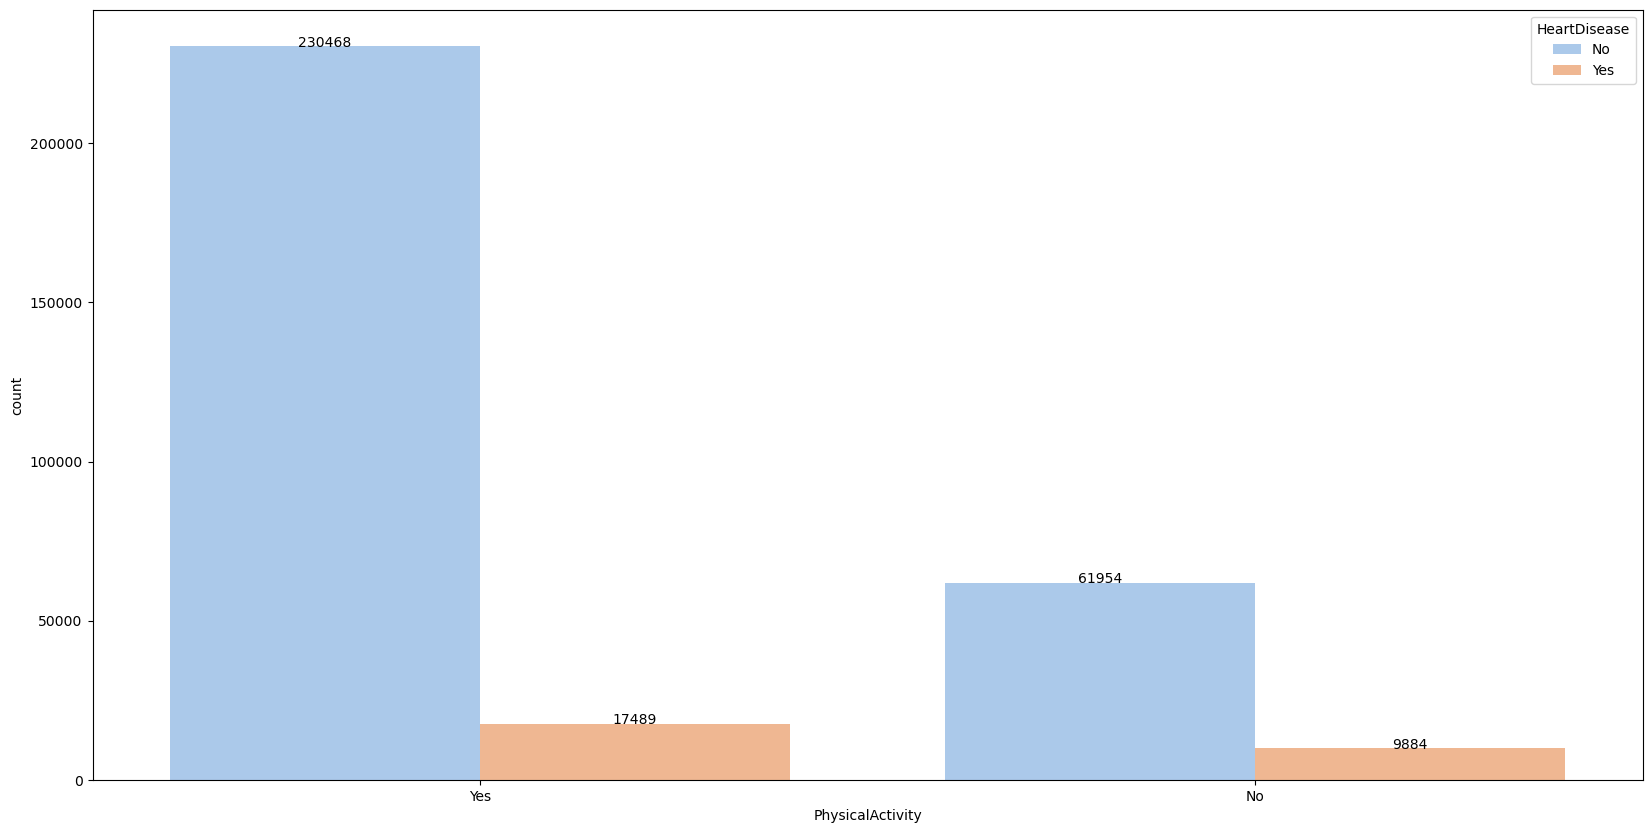

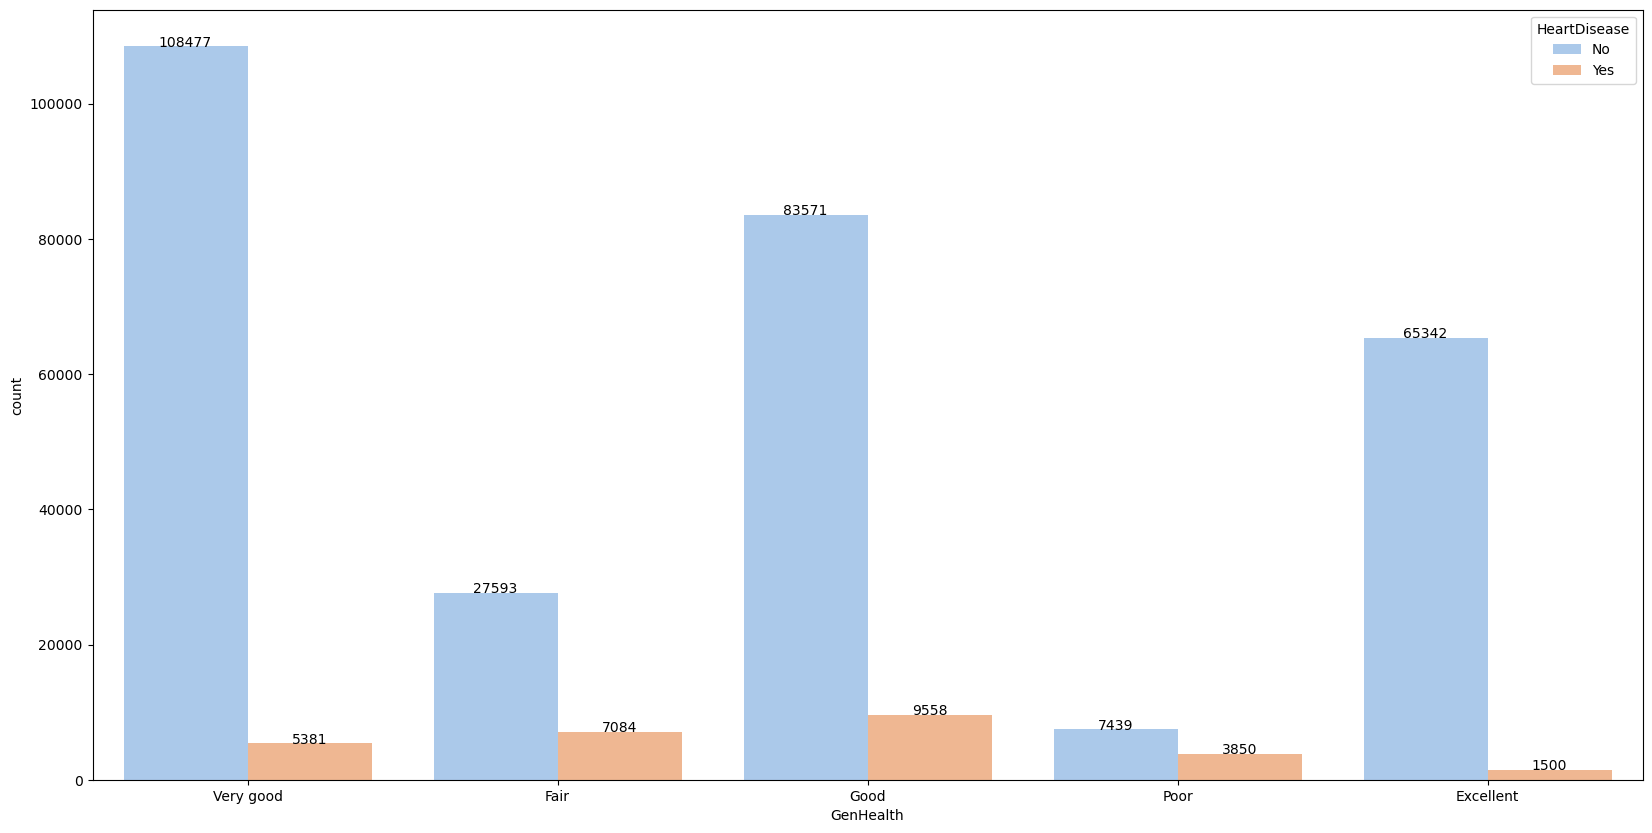

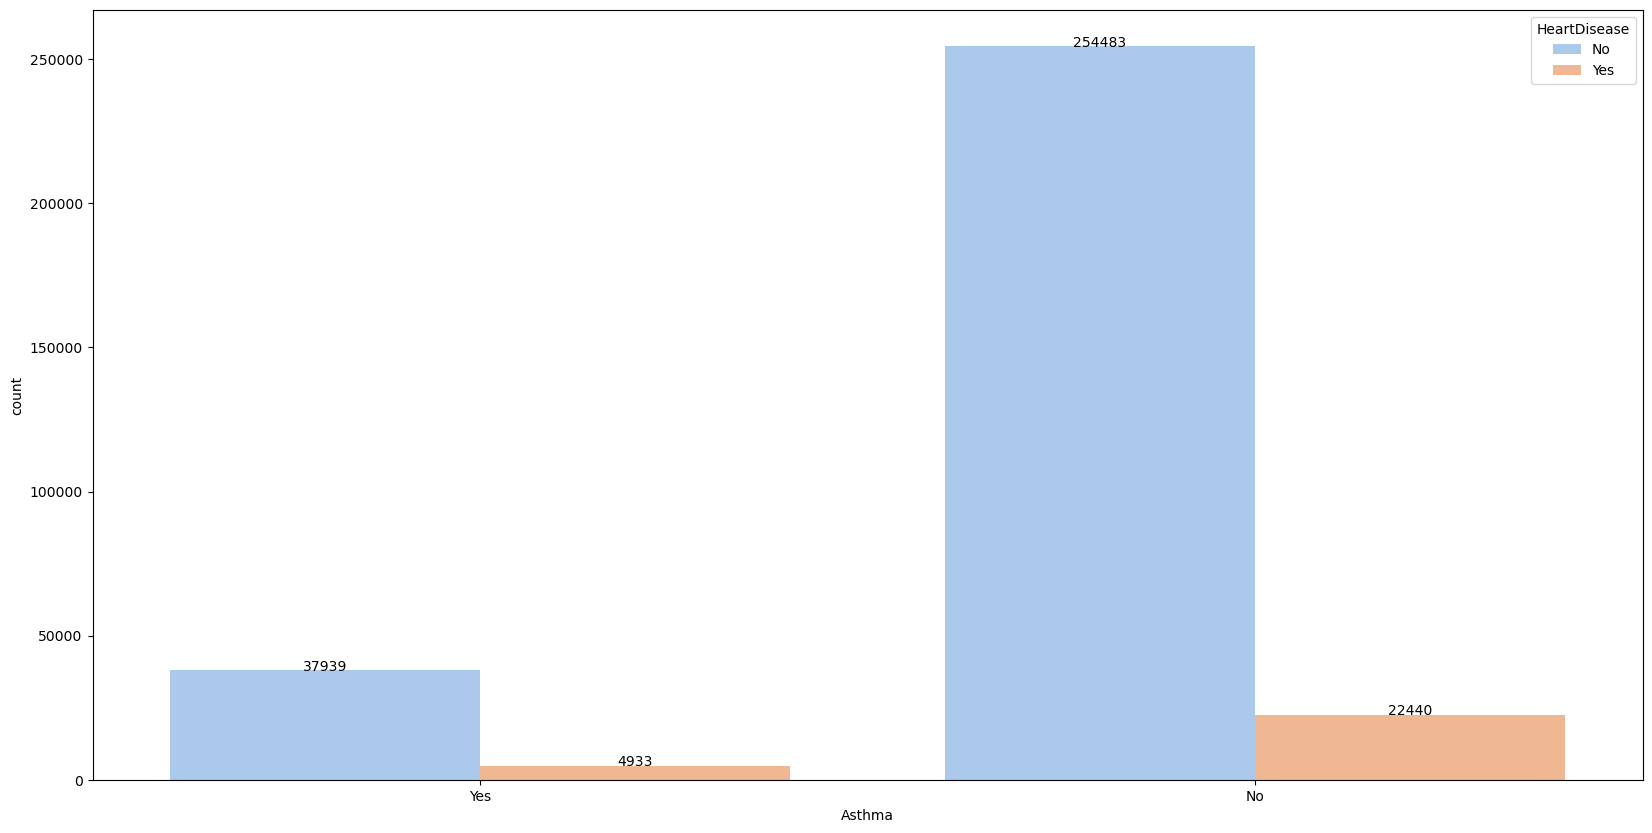

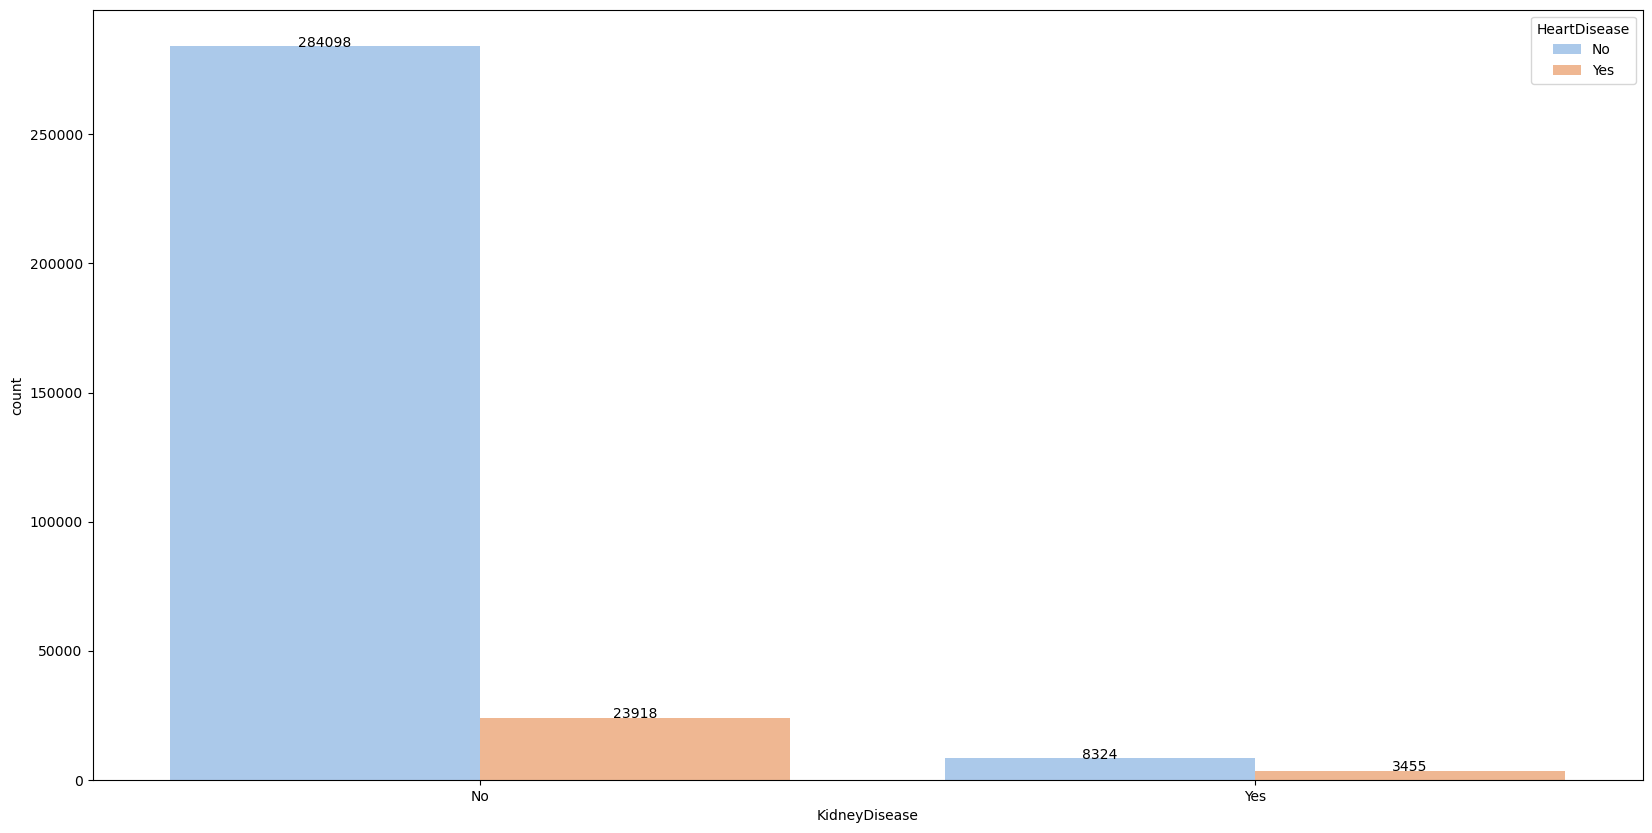

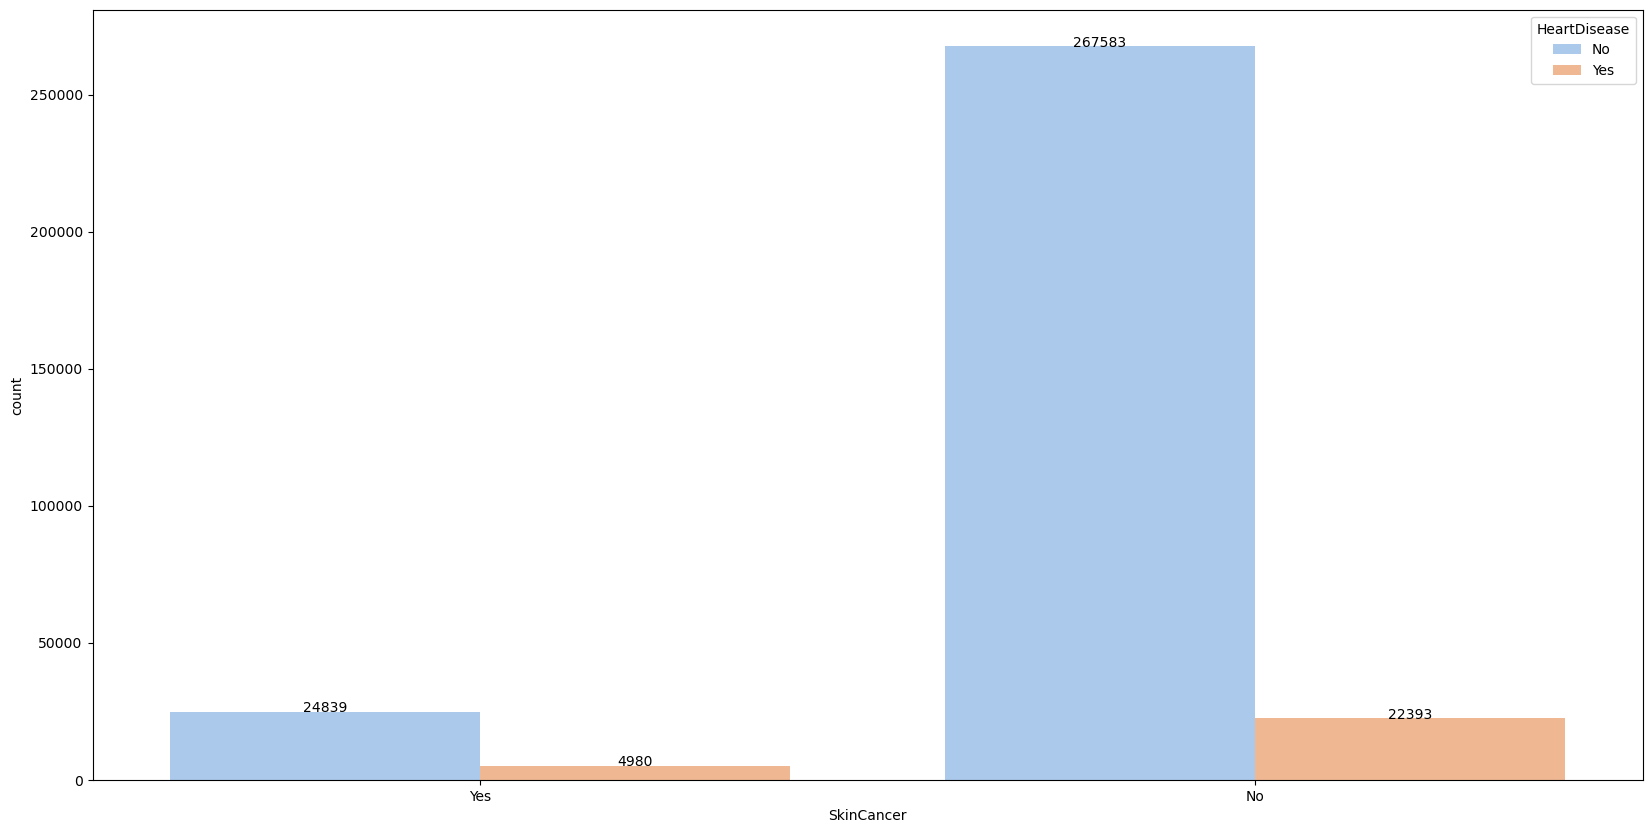

In [30]:
import warnings
warnings.filterwarnings('ignore')

for feature in categorical_features:
    fig, ax1 = plt.subplots(figsize=(20,10))
    graph = sns.countplot(ax=ax1,x = feature , data = df,hue='HeartDisease',palette='pastel')
    #graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

From the graphs above,categorical variables like Stroke,DiffWalking,AgeCategory,Race and Diabetic may be important indicator to detect heart disease

## variable independence

Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'SkinCancer',
       'Sex', 'BMI', 'Asthma', 'Race', 'MentalHealth', 'SleepTime',
       'GenHealth', 'AlcoholDrinking', 'PhysicalActivity'],
      dtype='object')


<AxesSubplot:>

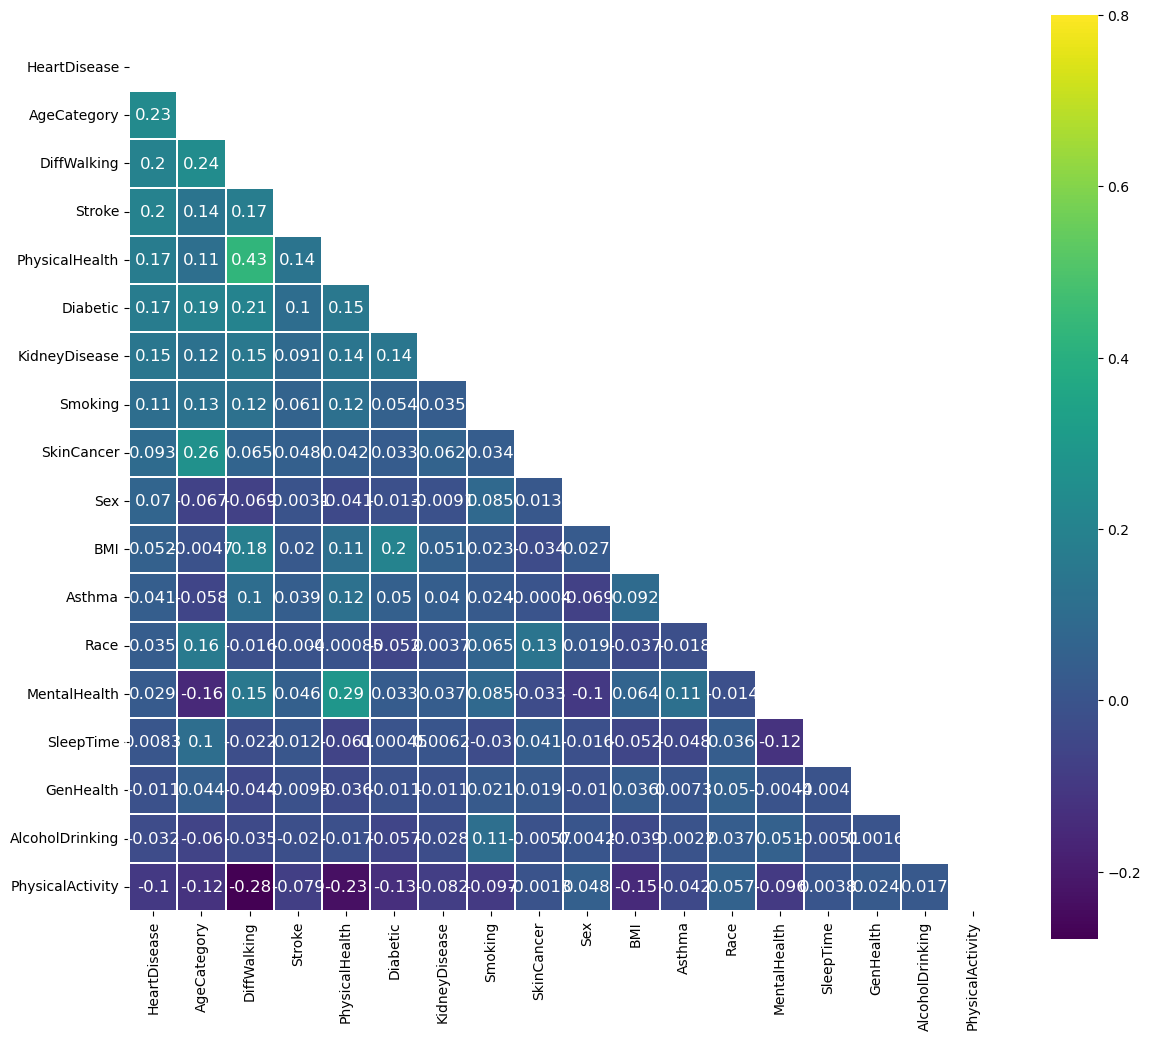

In [34]:
k= 18
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
mask = np.triu(np.ones_like(df.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

From the correlation matrix,the strength of correlation between variables are considered low to moderate.(all below 0.5)

Therefore,dimension reduction methods are not necessary for the data set

In [ ]:
## data pre

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[categorical_features])
df[categorical_features] = enc.transform(df[categorical_features])